# Code Clause

TASK 1 : SENTIMENT ANALYSIS

DONE BY : MEERA P V (CC39610)

Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral. 

Dataset : https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset

#### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### IMPORT DATASET

In [2]:
df = pd.read_csv("FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


#### EDA

In [5]:
df.head(5)

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [6]:
df.tail(5)

,Unnamed: 0,Toxicity,tweet
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies
56744,56744,0,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [8]:
df.isnull().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'Toxicity', 'tweet'], dtype='object')

In [10]:
df.describe()

,Unnamed: 0,Toxicity
count,56745.00000,56745.000000
mean,28372.00000,0.425641
std,16381.01485,0.494444
min,0.00000,0.000000
25%,14186.00000,0.000000
50%,28372.00000,0.000000
75%,42558.00000,1.000000
max,56744.00000,1.000000


#### PRE-PROCESSING

In [13]:
text_df = df.drop(['Unnamed: 0','Toxicity'],axis=1)
text_df.head()

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


In [15]:
print(text_df['tweet'].iloc[0],"\n")
print(text_df['tweet'].iloc[1],"\n")
print(text_df['tweet'].iloc[2],"\n")
print(text_df['tweet'].iloc[3],"\n")
print(text_df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [16]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   56745 non-null  object
dtypes: object(1)
memory usage: 443.4+ KB


In [20]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+https\S+", '',tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','',tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweet = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweet)

In [21]:
text_df.tweet = text_df['tweet'].apply(data_processing)

In [22]:
text_df = text_df.drop_duplicates('tweet')

In [23]:
stemmer = PorterStemmer()
def stemming(data):
    tweet = [stemmer.stem(word) for word in data]
    return data

In [24]:
text_df['tweet'] = text_df['tweet'].apply(lambda x: stemming(x))

<ipython-input-24-f0c41132134e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['tweet'] = text_df['tweet'].apply(lambda x: stemming(x))


In [25]:
text_df.head()

,tweet
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit cant use cause do...
2,bihday majesty
3,model love u take u time urð ðððð ððð
4,factsguide society motivation


In [26]:
print(text_df['tweet'].iloc[0],"\n")
print(text_df['tweet'].iloc[1],"\n")
print(text_df['tweet'].iloc[2],"\n")
print(text_df['tweet'].iloc[3],"\n")
print(text_df['tweet'].iloc[4],"\n")

user father dysfunctional selfish drags kids dysfunction run 

user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time urð ðððð ððð 

factsguide society motivation 



In [27]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54071 entries, 0 to 56744
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   54071 non-null  object
dtypes: object(1)
memory usage: 844.9+ KB


In [31]:
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [32]:
text_df['polarity'] = text_df['tweet'].apply(polarity)

In [33]:
text_df.head(10)

,tweet,polarity
0,user father dysfunctional selfish drags kids d...,-0.5
1,user user thanks lyft credit cant use cause do...,0.2
2,bihday majesty,0.0
3,model love u take u time urð ðððð ððð,0.5
4,factsguide society motivation,0.0
5,22 huge fan fare big talking leave chaos pay d...,0.2
6,user camping tomorrow user user user user user...,0.0
7,next school year year examsð cant think ð scho...,-0.4
8,love land allin cavs champions cleveland cleve...,0.5
9,user user welcome im gr8,0.8


In [34]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [35]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [36]:
text_df.head()

,tweet,polarity,sentiment
0,user father dysfunctional selfish drags kids d...,-0.5,Negative
1,user user thanks lyft credit cant use cause do...,0.2,Positive
2,bihday majesty,0.0,Neutral
3,model love u take u time urð ðððð ððð,0.5,Positive
4,factsguide society motivation,0.0,Neutral


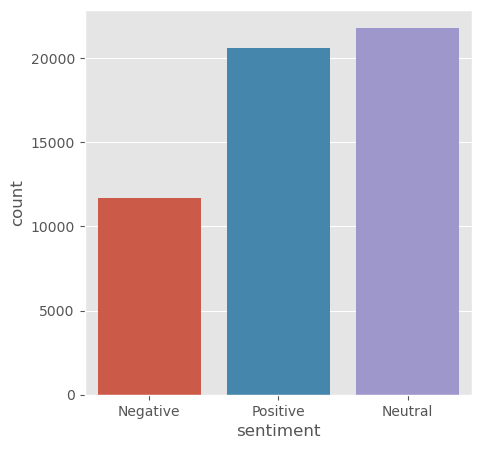

In [37]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)
plt.show()

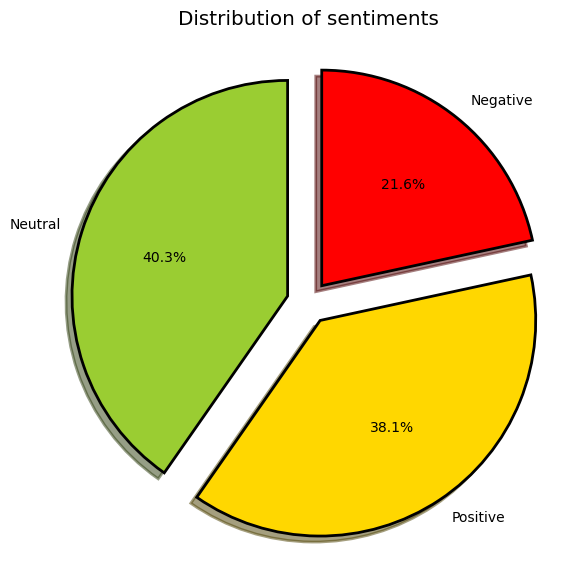

In [38]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
plt.show()

In [39]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,tweet,polarity,sentiment
18992,humans deserve best life rip lgbt friends may ...,1.0,Positive
1666,user wonderful user dennis grube sta anges lgb...,1.0,Positive
55758,even nature looks awesome colored 663399becca ...,1.0,Positive
6260,best decision ive made quite time,1.0,Positive
26798,every chance get im placewine fire perfect wea...,1.0,Positive


<Figure size 2000x1500 with 0 Axes>

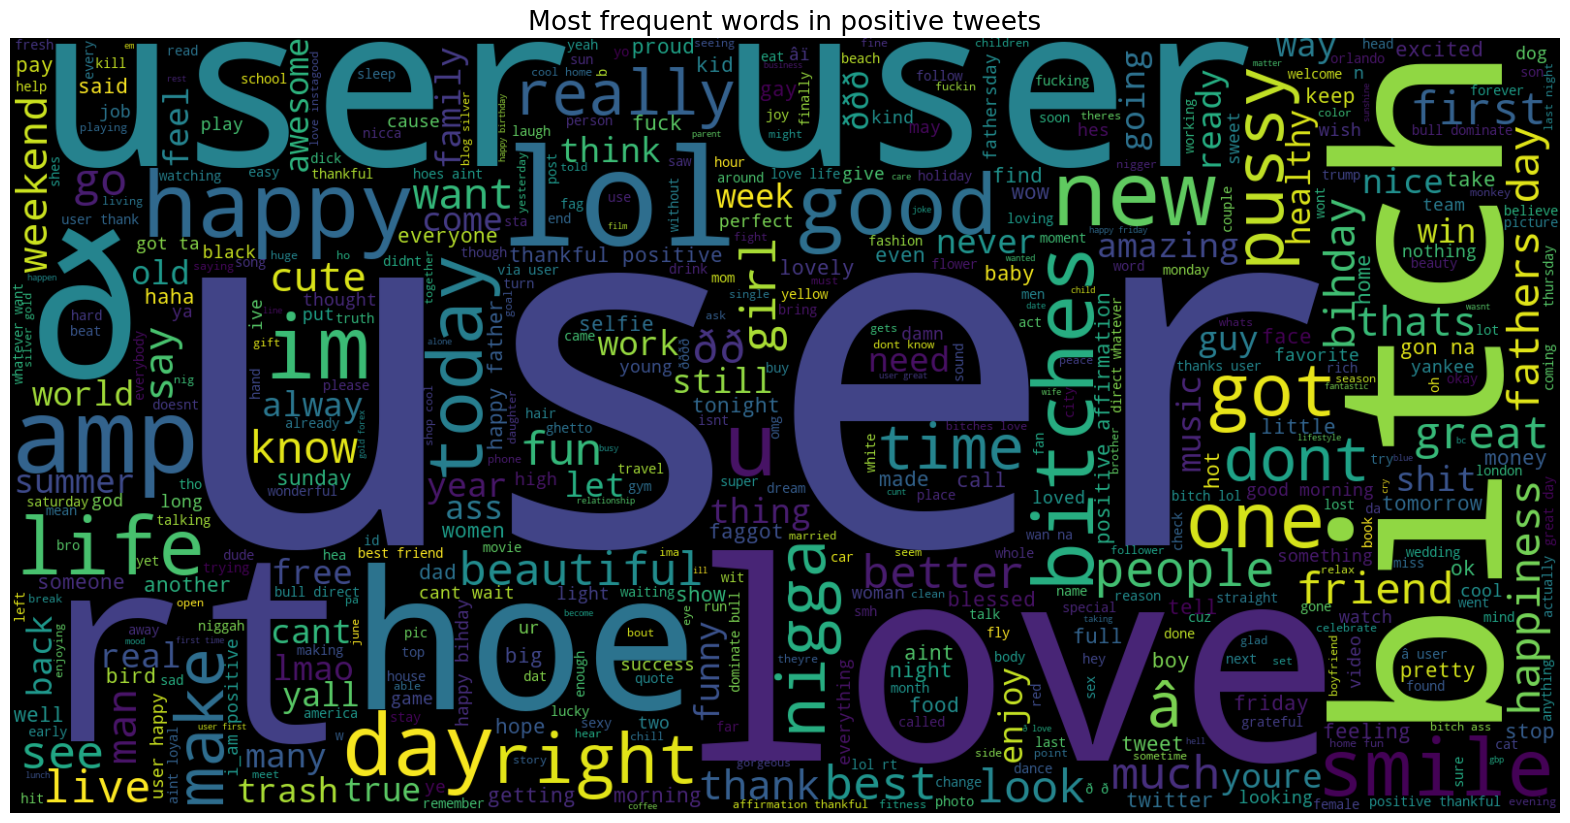

In [45]:
text = ' '.join([word for word in pos_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [42]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,tweet,polarity,sentiment
3299,user tried vanilla sweet cream cold brew wasnt...,-6.938894e-18,Negative
2195,poor innocent child dead top killed shit ton g...,-9.251859e-18,Negative
2104,people fail recognize good things happen lives...,-1.850372e-17,Negative
27310,people get hu learn hate inshot cute summer bl...,-1.850372e-17,Negative
32197,shun_stokes 128514128514128514128514rt bluprin...,-1.850372e-17,Negative


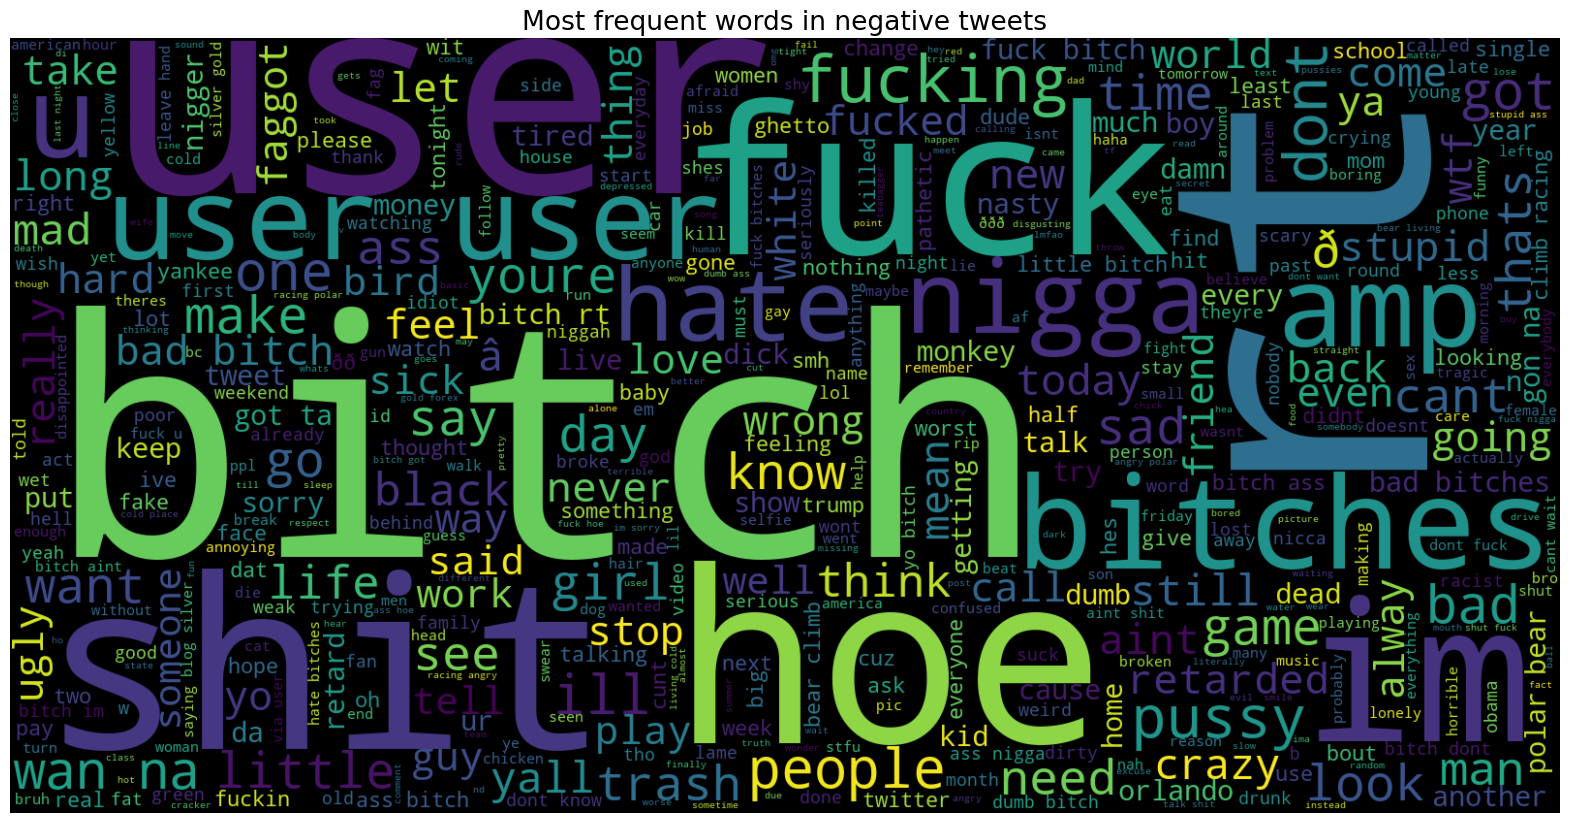

In [43]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [46]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,tweet,polarity,sentiment
2,bihday majesty,0.0,Neutral
38925,samzbikowski negro amigo pulled gun nate weeks...,0.0,Neutral
38943,sayy_coneee bitch texted,0.0,Neutral
38941,savannacurry_ like make bitches move,0.0,Neutral
38939,saucygyro shes dyke amp looks like shes 12,0.0,Neutral


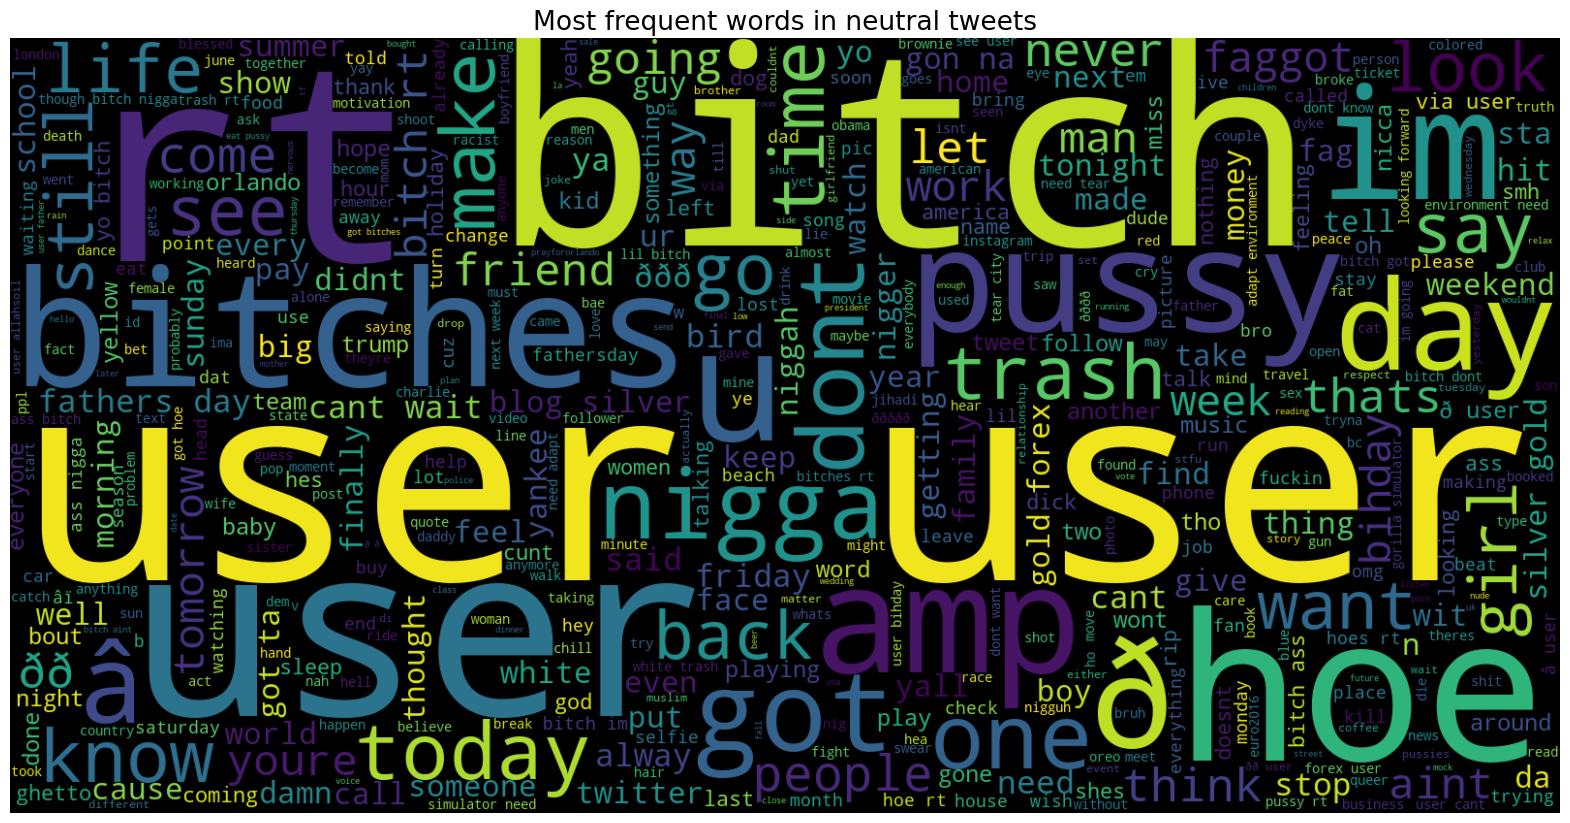

In [47]:
text = ' '.join([word for word in neutral_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

# Conclusion

This dataset is a combination of various datasets which had high levels of class imbalance in them. No data was changed edited or removed from any of the datasets to maintain the integrity of the data. Only a combination of various datasets in order to achieve balance. Sentiment analysis is performed to identify the sentiments of the people towards various topics.As shown from the sentiment analysis, most of the tweets are neutral (40.3%), whereas 38.1% are positive and 21.6% are negative. In a word-cloud of negative tweets, words like "hoe", "bitch", "shit", "ugly", "hate" are found that clearly show how negative posts are in the dataset. However, the subjevtivity of positive tweets (38.1%) was found to be higher than that of negative (21.6%) tweets. The post shows that tweets are combining good with bad tweets. 